In [16]:
import json
from collections import defaultdict

def process_file(file_path):
    eventuality_patterns = defaultdict(int)
    relation_patterns = defaultdict(int)
    data_list = []

    with open(file_path, 'r') as file:
        for line in file:
            data = json.loads(line)
            statement = data['statement']
            eventuality_pattern = data['eventuality pattern']
            relation_pattern = data['relation pattern']

            eventuality_patterns[eventuality_pattern] += 1
            relation_patterns[relation_pattern] += 1
            data_list.append((statement, eventuality_pattern, relation_pattern))

    return eventuality_patterns, relation_patterns, data_list

def print_top_patterns(patterns, top_n=10):
    sorted_patterns = sorted(patterns.items(), key=lambda x: x[1], reverse=True)
    for pattern, count in sorted_patterns[:top_n]:
        print(f"{pattern}: {count}")

def print_spreadsheet_format(data_list):
    print("Statement,Eventuality Pattern,Relation Pattern")
    for statement, eventuality_pattern, relation_pattern in data_list:
        print(f'"{statement}","{eventuality_pattern}","{relation_pattern}"')

# Process each file
files = ["/media/corey/Second Drive/capstone/Benchmark Extraction/jsonl evr patterns/cs_qa.jsonl",
         "/media/corey/Second Drive/capstone/Benchmark Extraction/jsonl evr patterns/pi_qa.jsonl",
         "/media/corey/Second Drive/capstone/Benchmark Extraction/jsonl evr patterns/si_qa.jsonl",
         "/media/corey/Second Drive/capstone/Benchmark Extraction/jsonl evr patterns/swag.jsonl",
         "/media/corey/Second Drive/capstone/Benchmark Extraction/jsonl evr patterns/winogrande.jsonl"]

for file in files:
    print(f"\nProcessing file: {file}")
    eventuality_patterns, relation_patterns, data_list = process_file(file)

    #print("Top Eventuality Patterns:")
    #print_top_patterns(eventuality_patterns)

    #print("Top Relation Patterns:")
    #print_top_patterns(relation_patterns)

    print("\nSpreadsheet Format:")
    print_spreadsheet_format(data_list)


Processing file: /media/corey/Second Drive/capstone/Benchmark Extraction/jsonl evr patterns/cs_qa.jsonl

Spreadsheet Format:
Statement,Eventuality Pattern,Relation Pattern
"When Bill sits down on a whoopie cushion, he will make a flatulence sound.","s-v-p-o, s-v-o","Result"
"Laughter is likely to be heard by those going to a party.","spass-v-p-o","none"
"A handsome prince is a stock character common to a fairy tale.","s-be-a-p-o","none"
"The United States covers the largest percentage of the pacific northwest.","s-v-o","none"
"When black and white balls are kicked with feet a soccer game is being played.","spass-v, s-v","Synchronous"
"If someone had been smoking, an easy way to tell would be if they were coughing.","s-v, s-v","Condition"
"Billy was smart but inexperienced. In many ways he was ignorant.","s-be-a, s-be-a","Contrast"
"Someone can find a shiny advertisement in a magazine.","s-v-o-p-o","none"
"The only thing left of the ancient giant lizards are fossils and bones.","s-be-a

In [1]:
import csv
from collections import defaultdict

def process_csv(file_path):
    eventuality_patterns = defaultdict(int)
    relation_patterns = defaultdict(int)
    data_list = []

    with open(file_path, 'r') as file:
        csv_reader = csv.DictReader(file)
        for row in csv_reader:
            statement = row['statement']
            restatement = row['restatement']
            eventuality_pattern = row['Eventuality Pattern']
            relation_pattern = row['Relation Pattern']

            eventuality_patterns[eventuality_pattern] += 1
            relation_patterns[relation_pattern] += 1
            data_list.append((statement, restatement, eventuality_pattern, relation_pattern))

    return eventuality_patterns, relation_patterns, data_list

def print_top_patterns(patterns, top_n=10):
    sorted_patterns = sorted(patterns.items(), key=lambda x: x[1], reverse=True)
    for pattern, count in sorted_patterns[:top_n]:
        print(f"{pattern}: {count}")

def print_spreadsheet_format(data_list):
    print("Statement,Restatement,Eventuality Pattern,Relation Pattern")
    for statement, restatement, eventuality_pattern, relation_pattern in data_list:
        print(f'"{statement}","{restatement}","{eventuality_pattern}","{relation_pattern}"')

# Process the aggregated CSV file
csv_file = "/media/corey/Second Drive/capstone/Benchmark Extraction/formatted_statements.csv"

print(f"\nProcessing file: {csv_file}")
eventuality_patterns, relation_patterns, data_list = process_csv(csv_file)

print("Top Eventuality Patterns:")
print_top_patterns(eventuality_patterns)

print("Top Relation Patterns:")
print_top_patterns(relation_patterns)

print("\nSpreadsheet Format:")
print_spreadsheet_format(data_list)


Processing file: /media/corey/Second Drive/capstone/Benchmark Extraction/formatted_statements.csv
Top Eventuality Patterns:
s-v-p-o, s-v-o-p-o: 11
s-v-p-o, s-v-p-o: 9
s-v-o-p-o: 7
s-v-o, s-v-o-p-o: 7
s-v-o-p-o, s-v-o: 7
s-v-o-p-o, s-v-o-p-o: 6
s-be-a, s-v-o-p-o: 5
s-be-a-p-o, s-v-o-p-o: 5
s-v-o-p-o, s-be-a: 5
s-v-p-o, s-v-o: 4
Top Relation Patterns:
none: 75
Reason: 44
Succession: 31
Synchronous: 17
Contrast: 13
Result: 12
Condition: 9
Precedence: 8
Conjunction, Succession: 5
Conjunction: 4

Spreadsheet Format:
Statement,Restatement,Eventuality Pattern,Relation Pattern
"Bill sits down on a whoopee cushion, what sound does he make when he sits? Answer: flatulence","When Bill sits down on a whoopie cushion, he will make a flatulence sound.","s-v-p-o, s-v-o","Result"
"What is likely heard by those going to a party? Answer: laughter","Laughter is likely to be heard by those going to a party.","spass-v-p-o","none"
"A handsome prince is a stock character common to what? Answer: fairy tale",

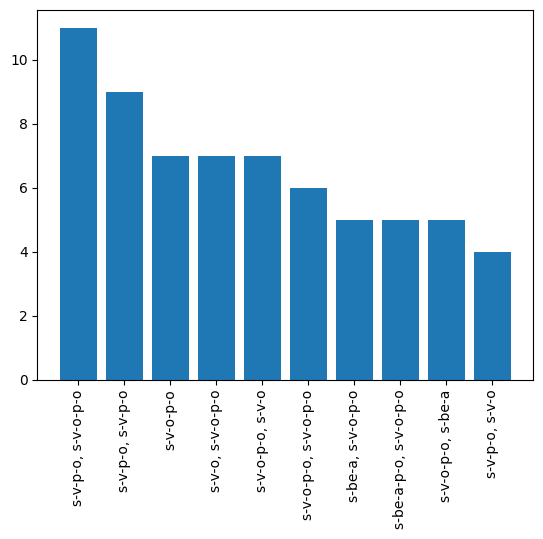

In [5]:
# visualising top eventuality patterns
import matplotlib.pyplot as plt

top_eventuality_patterns = dict(sorted(eventuality_patterns.items(), key=lambda x: x[1], reverse=True)[:10])
plt.bar(top_eventuality_patterns.keys(), top_eventuality_patterns.values())
plt.xticks(rotation=90)
plt.show()


In [ ]:
# top single hop eventuality patterns
single_hop_eventuality_patterns = {k: v for k, v in eventuality_patterns.items() if 'single-hop' in k}

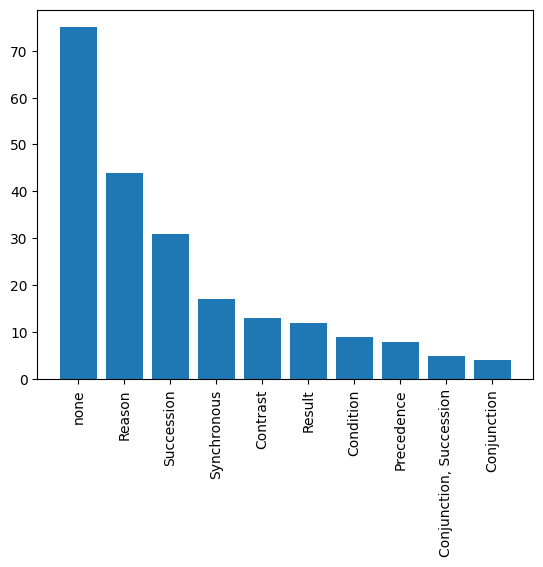

In [3]:
# visualising top relation patterns
top_relation_patterns = dict(sorted(relation_patterns.items(), key=lambda x: x[1], reverse=True)[:10])
plt.bar(top_relation_patterns.keys(), top_relation_patterns.values())
plt.xticks(rotation=90)
plt.show()
